In [63]:
# 导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体为SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为

In [44]:
file_path = './data/附件1_1990-2023年各地区医疗卫生机构数(个).xlsx'
df = pd.read_excel(file_path)

df.head()

,年份,中国,北京市,天津市,河北省,山西省,内蒙古,辽宁省,吉林省,黑龙江,...,重庆市,四川省,贵州省,云南省,西藏,陕西省,甘肃省,青海省,宁夏,新疆
0,1990,1012690.0,4953,3392,10586,6108,5161,7863,4407,8945,...,--,15056,6949,6671,1110,6416,4132,1218,1163,3945
1,1991,1003769.0,4970,3397,10647,6121,5172,7736,4369,8878,...,--,15077,6908,6708,1197,6433,4178,1184,1129,3937
2,1992,1001310.0,4868,3287,10715,5935,5253,7921,4189,8853,...,--,15005,4734,6765,1223,6404,4192,1187,1120,3985
3,1993,1000531.0,4962,3182,10958,6085,4932,7132,4006,7702,...,--,14255,3908,6469,1068,6215,4141,1172,1037,3894
4,1994,1005271.0,4958,3182,10274,5996,4918,6849,3920,7714,...,--,14217,3930,6474,1152,6227,4134,1177,1037,3907


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年份      34 non-null     int64  
 1   中国      34 non-null     float64
 2   北京市     34 non-null     int64  
 3   天津市     34 non-null     object 
 4   河北省     34 non-null     int64  
 5   山西省     34 non-null     object 
 6   内蒙古     34 non-null     object 
 7   辽宁省     34 non-null     object 
 8   吉林省     34 non-null     object 
 9   黑龙江     34 non-null     object 
 10  上海市     34 non-null     object 
 11  江苏省     34 non-null     object 
 12  浙江省     34 non-null     object 
 13  安徽省     34 non-null     int64  
 14  福建省     34 non-null     float64
 15  江西省     34 non-null     int64  
 16  山东省     34 non-null     float64
 17  河南省     34 non-null     int64  
 18  湖北省     34 non-null     float64
 19  湖南省     34 non-null     object 
 20  广东省     34 non-null     float64
 21  广西      34 non-null     int64  
 22  海南省 

In [57]:
# 数据预处理
# 将--转化成Nan
df.replace('--', np.nan, inplace=True)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)

missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

天津市    2
山西省    1
内蒙古    1
辽宁省    2
吉林省    2
黑龙江    1
上海市    2
江苏省    1
浙江省    2
湖南省    2
海南省    2
重庆市    6
西藏     2
陕西省    2
dtype: int64


In [55]:
missing_values.index[1]

'山西省'

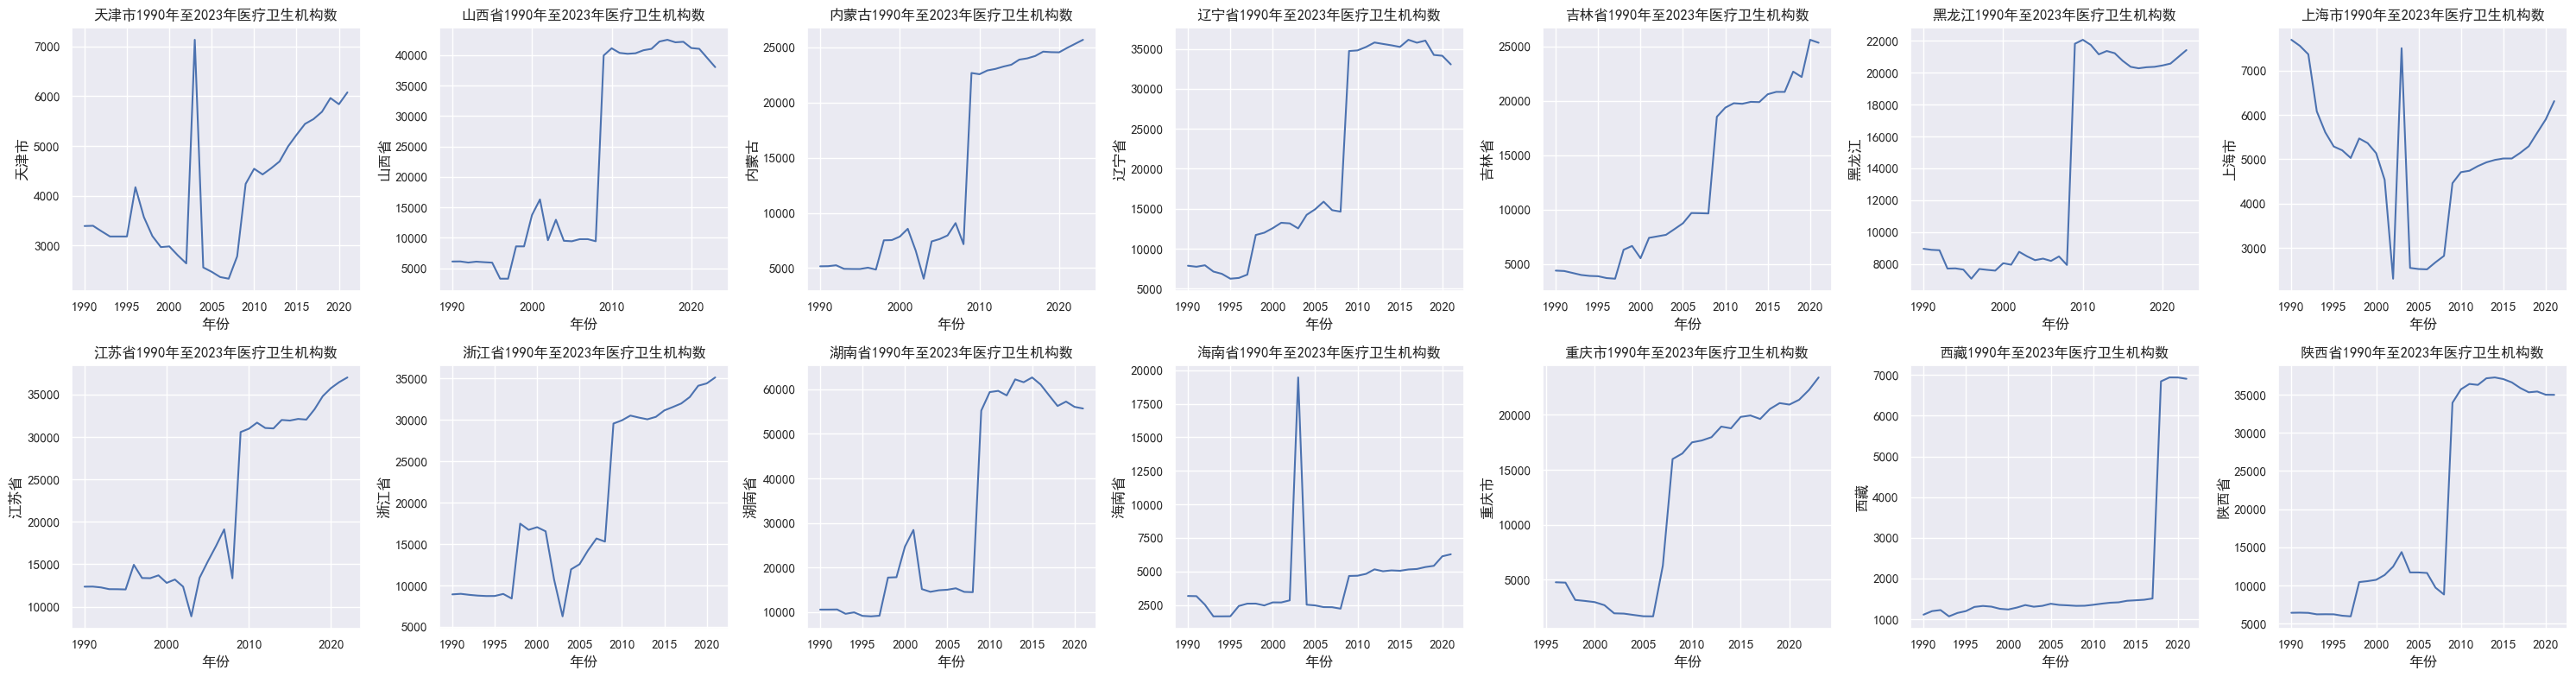

In [67]:
# 观察数据趋势
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(30, 8))

axes = axes.flatten()
for i, city in enumerate(missing_values.index):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 设置负号显示
    sns.lineplot(data=df, x='年份', y=city, ax=axes[i])
    axes[i].set_title(f'{city}1990年至2023年医疗卫生机构数')

plt.tight_layout()
plt.show()

In [18]:
# 年均增长率函数（CAGR）
def calculate_cagr(start, end, periods):
    return (end / start) ** (1 / periods) - 1

In [22]:
# 计算各地区的年均增长率
regions = df.columns[1:]  # 排除年份列
growth_rates = {}

for region in regions:
    start_value = df[region].iloc[0]
    end_value = df[region].iloc[-1]
    periods = df['年份'].iloc[-1] - df['年份'].iloc[0]
    print(f"地区：{start_value}, 周期：{end_value}")
    growth_rate = calculate_cagr(start_value, end_value, periods)
    growth_rates[region] = growth_rate

print(growth_rates)

地区：1012690.0, 周期：1071000.0
地区：4953, 周期：12518
地区：3392.0, 周期：nan
地区：10586, 周期：92825
地区：6108.0, 周期：38000.0
地区：5161.0, 周期：25685.0
地区：7863.0, 周期：nan
地区：4407.0, 周期：nan
地区：8945.0, 周期：21425.0
地区：7690.0, 周期：nan
地区：12366.0, 周期：nan
地区：8917.0, 周期：nan
地区：7336, 周期：31361
地区：4885.0, 周期：30000.0
地区：5632, 周期：40120
地区：11040.0, 周期：88000.0
地区：8676, 周期：85038
地区：10472.0, 周期：38489.0
地区：10552.0, 周期：nan
地区：8989.0, 周期：62900.0
地区：5791, 周期：34904
地区：3167.0, 周期：nan
地区：nan, 周期：23389.0
地区：15056, 周期：75109
地区：6949, 周期：30722
地区：6671, 周期：28765
地区：1110.0, 周期：nan
地区：6416.0, 周期：nan
地区：4132, 周期：25345
地区：1218, 周期：6949
地区：1163, 周期：4863
地区：3945, 周期：16427
{'中国': 0.0016978832515870401, '北京市': 0.028494606972709446, '天津市': nan, '河北省': 0.06800609049362749, '山西省': 0.05695648596938052, '内蒙古': 0.04983142130751572, '辽宁省': nan, '吉林省': nan, '黑龙江': 0.026822002911671694, '上海市': nan, '江苏省': nan, '浙江省': nan, '安徽省': 0.04500678077433706, '福建省': 0.056541514213513056, '江西省': 0.061302877584158644, '山东省': 0.06492394884849251, '河南省': 0.071616018452821